In [ ]:
# Polynomial Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing dataset
data_set = pd.read_csv('https://trello-attachments.s3.amazonaws.com/60596dc01945760f799067c1/607e52cfbf5d601da434fa03/f1883022706dfd2ae69d55dd62d8c998/Position_Salaries.csv')
data_set

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
# Extracting the Independent and Depenedent Variable
X = data_set.Level.values[:,np.newaxis]
y = data_set.Salary.values

In [ ]:
# Splitting the dataset into the Training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_sizw=0.2, random_state=0)

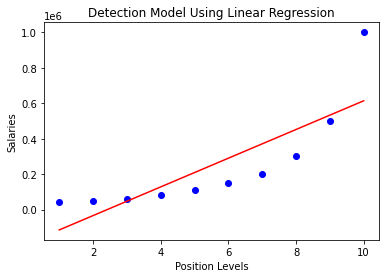

In [ ]:
# Build Linear Regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

# Visualize The Result for Linear Regression
plt.scatter(X,y, color='blue')
plt.plot(X, lin_reg.predict(X), color='red')
plt.title('Detection Model Using Linear Regression')
plt.xlabel('Position Levels')
plt.ylabel('Salaries')
plt.show();

In [ ]:
# Building the Polynomial Regression Model with Degree=2
# Fitting the Polynomial Regression to the Dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(X)
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [ ]:
# Fit the Polynomial Degree=2 Regression Model
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly , y)

LinearRegression()

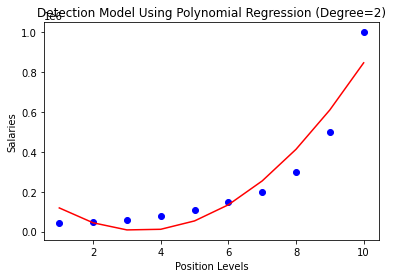

In [ ]:
# Visualize the Result for Polynomial Degree=2 Regression Model
plt.scatter(X,y, color='blue')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color='red')
plt.title('Detection Model Using Polynomial Regression (Degree=2)')
plt.xlabel('Position Levels')
plt.ylabel('Salaries')
plt.show();

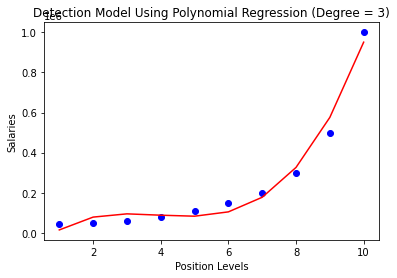

In [ ]:
# Increase the Polynomial Expression Degree = 3

poly_reg = PolynomialFeatures(degree=3)
x_poly = poly_reg.fit_transform(X)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(x_poly , y)

# Visualize the Result for Polynomial Degree=3 Regression Model
plt.scatter(X,y,color='blue')
plt.plot(X,lin_reg_3.predict(poly_reg.fit_transform(X)),color='red')
plt.title('Detection Model Using Polynomial Regression (Degree = 3)')
plt.xlabel('Position Levels')
plt.ylabel('Salaries')
plt.show()

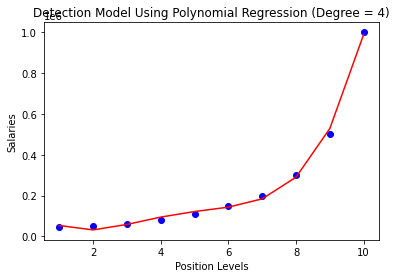

In [ ]:
# Increase the Polynomial Expression Degree = 4 (will give the most accurate result)

poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(X)
lin_reg_4 = LinearRegression()
lin_reg_4.fit(x_poly , y)

# Visualize the Result for Polynomial Degree=4 Regression Model
plt.scatter(X,y,color='blue')
plt.plot(X,lin_reg_4.predict(poly_reg.fit_transform(X)),color='red')
plt.title('Detection Model Using Polynomial Regression (Degree = 4)')
plt.xlabel('Position Levels')
plt.ylabel('Salaries')
plt.show();

In [ ]:
# Iterate the Linear Regression Model through X
lin_reg = LinearRegression().fit(X,y)
lin_pred = lin_reg.predict(X)
lin_pred

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

In [ ]:
df_lin_reg = pd.DataFrame(lin_pred, columns=['Pred_Lin_Reg'])
df_lin_reg

,Pred_Lin_Reg
0,-114454.545455
1,-33575.757576
2,47303.030303
3,128181.818182
4,209060.606061
5,289939.393939
6,370818.181818
7,451696.969697
8,532575.757576
9,613454.545455


In [ ]:
# Iterate the exponent of the Polynomial Regression in a loop
prediction_collector = []
for i in [2,3,4]:
  poly_reg = PolynomialFeatures(degree=i)
  
  # Train
  x_poly = poly_reg.fit_transform(X)
  lin_reg_forloop = LinearRegression()
  lin_reg_forloop.fit(x_poly, y)
  
  # Test
  y_pred = lin_reg_forloop.predict(poly_reg.fit_transform(X))

  # To collect the answer
  prediction_collector.append(y_pred)

pred_collector = np.transpose(prediction_collector)
pred_collector

array([[118727.27272727,  14902.0979021 ,  53356.64335675],
       [ 44151.51515151,  78759.9067599 ,  31759.90675984],
       [  8439.39393939,  94960.37296037,  58642.1911421 ],
       [ 11590.90909091,  88223.77622377,  94632.86713282],
       [ 53606.06060606,  83270.39627039, 121724.94172495],
       [134484.84848485, 104820.51282051, 143275.05827509],
       [254227.27272727, 177594.40559441, 184003.49650352],
       [412833.33333333, 326312.35431236, 289994.17249417],
       [610303.03030303, 575694.63869464, 528694.63869462],
       [846636.36363636, 950461.53846154, 988916.08391613]])

In [ ]:
df2 = pd.DataFrame(pred_collector, columns=['Pred_Poly_Degree_2', 'Pred_Poly_Degree_3', 'Pred_Poly_Degree_4'])
df2

,Pred_Poly_Degree_2,Pred_Poly_Degree_3,Pred_Poly_Degree_4
0,118727.272727,14902.097902,53356.643357
1,44151.515152,78759.906760,31759.906760
2,8439.393939,94960.372960,58642.191142
3,11590.909091,88223.776224,94632.867133
4,53606.060606,83270.396270,121724.941725
5,134484.848485,104820.512821,143275.058275
6,254227.272727,177594.405594,184003.496504
7,412833.333333,326312.354312,289994.172494
8,610303.030303,575694.638695,528694.638695
9,846636.363636,950461.538462,988916.083916


In [ ]:
df_poly = df2.drop(df2.columns[:2], axis=1, inplace=True)
df2

,Pred_Poly_Degree_4
0,53356.643357
1,31759.906760
2,58642.191142
3,94632.867133
4,121724.941725
5,143275.058275
6,184003.496504
7,289994.172494
8,528694.638695
9,988916.083916


In [ ]:
df = pd.concat([data_set.reset_index(drop=True), df_lin_reg.reset_index(drop=True), df2.reset_index(drop=True)], axis=1)
df

,Position,Level,Salary,Pred_Lin_Reg,Pred_Poly_Degree_4
0,Business Analyst,1,45000,-114454.545455,53356.643357
1,Junior Consultant,2,50000,-33575.757576,31759.906760
2,Senior Consultant,3,60000,47303.030303,58642.191142
3,Manager,4,80000,128181.818182,94632.867133
4,Country Manager,5,110000,209060.606061,121724.941725
5,Region Manager,6,150000,289939.393939,143275.058275
6,Partner,7,200000,370818.181818,184003.496504
7,Senior Partner,8,300000,451696.969697,289994.172494
8,C-level,9,500000,532575.757576,528694.638695
9,CEO,10,1000000,613454.545455,988916.083916


In [ ]:
df['Bluffing'] = df.apply(lambda x: 'Yes' if x['Salary'] > x['Pred_Poly_Degree_4'] else 'No', axis=1)
df

,Position,Level,Salary,Pred_Lin_Reg,Pred_Poly_Degree_4,Bluffing
0,Business Analyst,1,45000,-114454.545455,53356.643357,No
1,Junior Consultant,2,50000,-33575.757576,31759.906760,Yes
2,Senior Consultant,3,60000,47303.030303,58642.191142,Yes
3,Manager,4,80000,128181.818182,94632.867133,No
4,Country Manager,5,110000,209060.606061,121724.941725,No
5,Region Manager,6,150000,289939.393939,143275.058275,Yes
6,Partner,7,200000,370818.181818,184003.496504,Yes
7,Senior Partner,8,300000,451696.969697,289994.172494,Yes
8,C-level,9,500000,532575.757576,528694.638695,No
9,CEO,10,1000000,613454.545455,988916.083916,Yes


In [ ]:
# Filter out only the 'Yes'
df = df.loc[df['Bluffing'] == 'Yes']
df2 = df.drop(['Pred_Lin_Reg'], axis=1, inplace=True)
df

,Position,Level,Salary,Pred_Poly_Degree_4,Bluffing
1,Junior Consultant,2,50000.0,31759.906760,Yes
2,Senior Consultant,3,60000.0,58642.191142,Yes
5,Region Manager,6,150000.0,143275.058275,Yes
6,Partner,7,200000.0,184003.496504,Yes
7,Senior Partner,8,300000.0,289994.172494,Yes
9,CEO,10,1000000.0,988916.083916,Yes


In [ ]:
df['Real_Bluffing'] = df.apply(lambda x:'Yes' if x['Salary']-x['Pred_Poly_Degree_4'] > 10000 else 'No', axis=1)
df

,Position,Level,Salary,Pred_Poly_Degree_4,Bluffing,Real_Bluffing
1,Junior Consultant,2,50000.0,31759.906760,Yes,Yes
2,Senior Consultant,3,60000.0,58642.191142,Yes,No
5,Region Manager,6,150000.0,143275.058275,Yes,No
6,Partner,7,200000.0,184003.496504,Yes,Yes
7,Senior Partner,8,300000.0,289994.172494,Yes,Yes
9,CEO,10,1000000.0,988916.083916,Yes,Yes


Typically, salary increment is around `10% to 20%`. However, the above table proved that some candidate are lying about their job salary. 

>Eg; `Junior Consultant` is concealing the fact that his/her salary should just be around `31759.906760`, but the amount of Salary put on the job application form is a whopping `57+%!`

Hence, it can be concluded that;
1. Junior Consultant
2. Partner
3. Senior Partner 
and even;
4. CEO 

are lying about the amount of Salary put in the application form. 